Chapter 25

# 状态向量转换
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码旨在通过可视化展示马尔可夫链中的转移矩阵及其作用于状态向量的结果。首先，定义了一个转移矩阵$T$，其形式为：

$$
T = \begin{pmatrix}
0.7 & 0.2 \\
0.3 & 0.8
\end{pmatrix}
$$

该矩阵表示系统状态之间的转移概率。例如，$T_{11} = 0.7$表示从状态1转移到状态1的概率，而$T_{12} = 0.2$则表示从状态1转移到状态2的概率。

接着，代码定义了初始状态向量$\pi_i$，其形式为：

$$
\pi_i = \begin{pmatrix}
0.6 \\
0.4
\end{pmatrix}
$$

这是在系统状态1和状态2下的初始概率分布，表示在时间点$i$时系统处于状态1的概率为0.6，而处于状态2的概率为0.4。

通过矩阵乘法$T \cdot \pi_i$，计算得到了下一个状态向量$\pi_{i+1}$，公式为：

$$
\pi_{i+1} = T \cdot \pi_i
$$

这个过程展示了马尔可夫链的一个关键特性，即通过转移矩阵可以预测未来的状态分布。

在可视化方面，代码生成了两个图。第一个图显示了转移矩阵$T$、当前状态向量$\pi_i$和下一个状态向量$\pi_{i+1}$，用热图形式表现了它们的数值。第二个图则展示了经过两次转移后的状态向量$\pi_{i+2}$，通过$T^2 \cdot \pi_i$来计算得到：

$$
\pi_{i+2} = T^2 \cdot \pi_i
$$

这样，用户可以直观地观察到不同状态向量的变化过程以及转移矩阵的作用。这种可视化方式对理解马尔可夫链的动态特性非常有效，尤其是在分析系统状态演变时。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于矩阵和向量运算
import seaborn as sns  # 导入Seaborn库，用于热图绘制
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图

## 定义转移矩阵和初始状态向量

In [2]:
T = np.matrix([[0.7, 0.2],  # 定义转移矩阵T，表示从一个状态到另一个状态的转移概率
               [0.3, 0.8]])  # 转移矩阵的每行表示一个状态

In [3]:
pi_i = np.matrix([[0.6],  # 定义初始状态向量pi_i，表示初始时刻各状态的概率
                  [0.4]])  # 每个元素表示对应状态的初始概率

## 计算状态向量的下一步状态

In [4]:
pi_i_1 = T @ pi_i  # 通过矩阵乘法计算下一时刻的状态向量pi_i_1

## 创建图形和子图，绘制转移过程的可视化

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

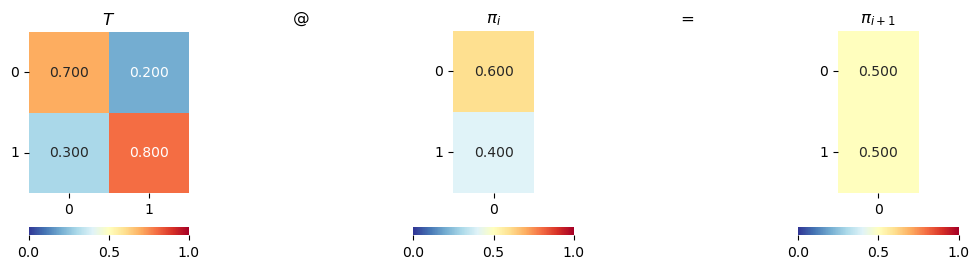

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))  # 创建包含5个子图的画布，设置整体尺寸为12x3

all_max = 1  # 设置热图的最大值为1，用于颜色映射
all_min = 0  # 设置热图的最小值为0，用于颜色映射

plt.sca(axes[0])  # 选择第一个子图
ax = sns.heatmap(T, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制转移矩阵的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$T$')  # 设置热图标题为转移矩阵T
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0

plt.sca(axes[1])  # 选择第二个子图
plt.title(r'$@$')  # 设置标题为符号@
plt.axis('off')  # 关闭坐标轴显示

plt.sca(axes[2])  # 选择第三个子图
ax = sns.heatmap(pi_i, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制当前状态向量pi_i的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$\pi_{i}$')  # 设置热图标题为当前状态向量pi_i
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0

plt.sca(axes[3])  # 选择第四个子图
plt.title(r'$=$')  # 设置标题为符号=
plt.axis('off')  # 关闭坐标轴显示

plt.sca(axes[4])  # 选择第五个子图
ax = sns.heatmap(pi_i_1, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制下一个状态向量pi_i_1的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$\pi_{i+1}$')  # 设置热图标题为下一状态向量pi_i_1
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0

## 计算状态向量的下两个状态

In [6]:
pi_i_2 = T @ T @ pi_i  # 通过两次矩阵乘法计算下两个时刻的状态向量pi_i_2

## 创建图形和子图，绘制转移过程的可视化

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

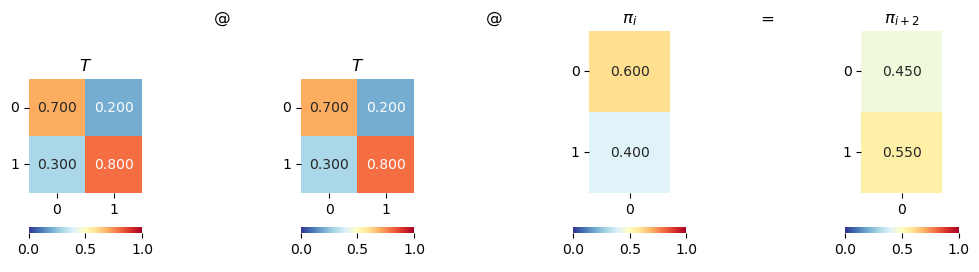

In [9]:
fig, axes = plt.subplots(1, 7, figsize=(12, 3))  # 创建包含7个子图的画布，设置整体尺寸为12x3

plt.sca(axes[0])  # 选择第一个子图
ax = sns.heatmap(T, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制转移矩阵T的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$T$')  # 设置热图标题为转移矩阵T
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0

plt.sca(axes[1])  # 选择第二个子图
plt.title(r'$@$')  # 设置标题为符号@
plt.axis('off')  # 关闭坐标轴显示

plt.sca(axes[2])  # 选择第三个子图
ax = sns.heatmap(T, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 再次绘制转移矩阵T的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$T$')  # 设置热图标题为转移矩阵T
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0

plt.sca(axes[3])  # 选择第四个子图
plt.title(r'$@$')  # 设置标题为符号@
plt.axis('off')  # 关闭坐标轴显示

plt.sca(axes[4])  # 选择第五个子图
ax = sns.heatmap(pi_i, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制当前状态向量pi_i的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$\pi_{i}$')  # 设置热图标题为当前状态向量pi_i
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0

plt.sca(axes[5])  # 选择第六个子图
plt.title(r'$=$')  # 设置标题为符号=
plt.axis('off')  # 关闭坐标轴显示

plt.sca(axes[6])  # 选择第七个子图
ax = sns.heatmap(pi_i_2, cmap='RdYlBu_r', vmax=all_max, vmin=all_min,  # 绘制下两个状态向量pi_i_2的热图
                 cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向为水平
                 annot=True, fmt=".3f")  # 在热图上标注数值，格式为小数点后三位
ax.set_aspect("equal")  # 设置坐标轴比例相等
plt.title(r'$\pi_{i+2}$')  # 设置热图标题为下两个状态向量pi_i_2
plt.yticks(rotation=0)  # 设置y轴刻度标签的旋转角度为0